In [1]:
# Checking for GPU
!nvidia-smi

Fri Oct 18 07:58:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

! pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Methods

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Model for Brain Tumor Detection

In [21]:
! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="**********")
project = rf.workspace("hari-d4xyf").project("harish-vlasr")
version = project.version(5)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to harish-5 in yolov8:: 100%|██████████| 4106/4106 [00:00<00:00, 5332.75it/s]


In [39]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

## Custom Training

In [22]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.3.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/harish-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

In [23]:
!ls {HOME}/runs/segment/train3/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					    MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					    MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			    results.csv       val_batch2_labels.jpg
confusion_matrix.png				    results.png       val_batch2_pred.jpg
events.out.tfevents.1729239387.3bb2be3803d2.5670.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content


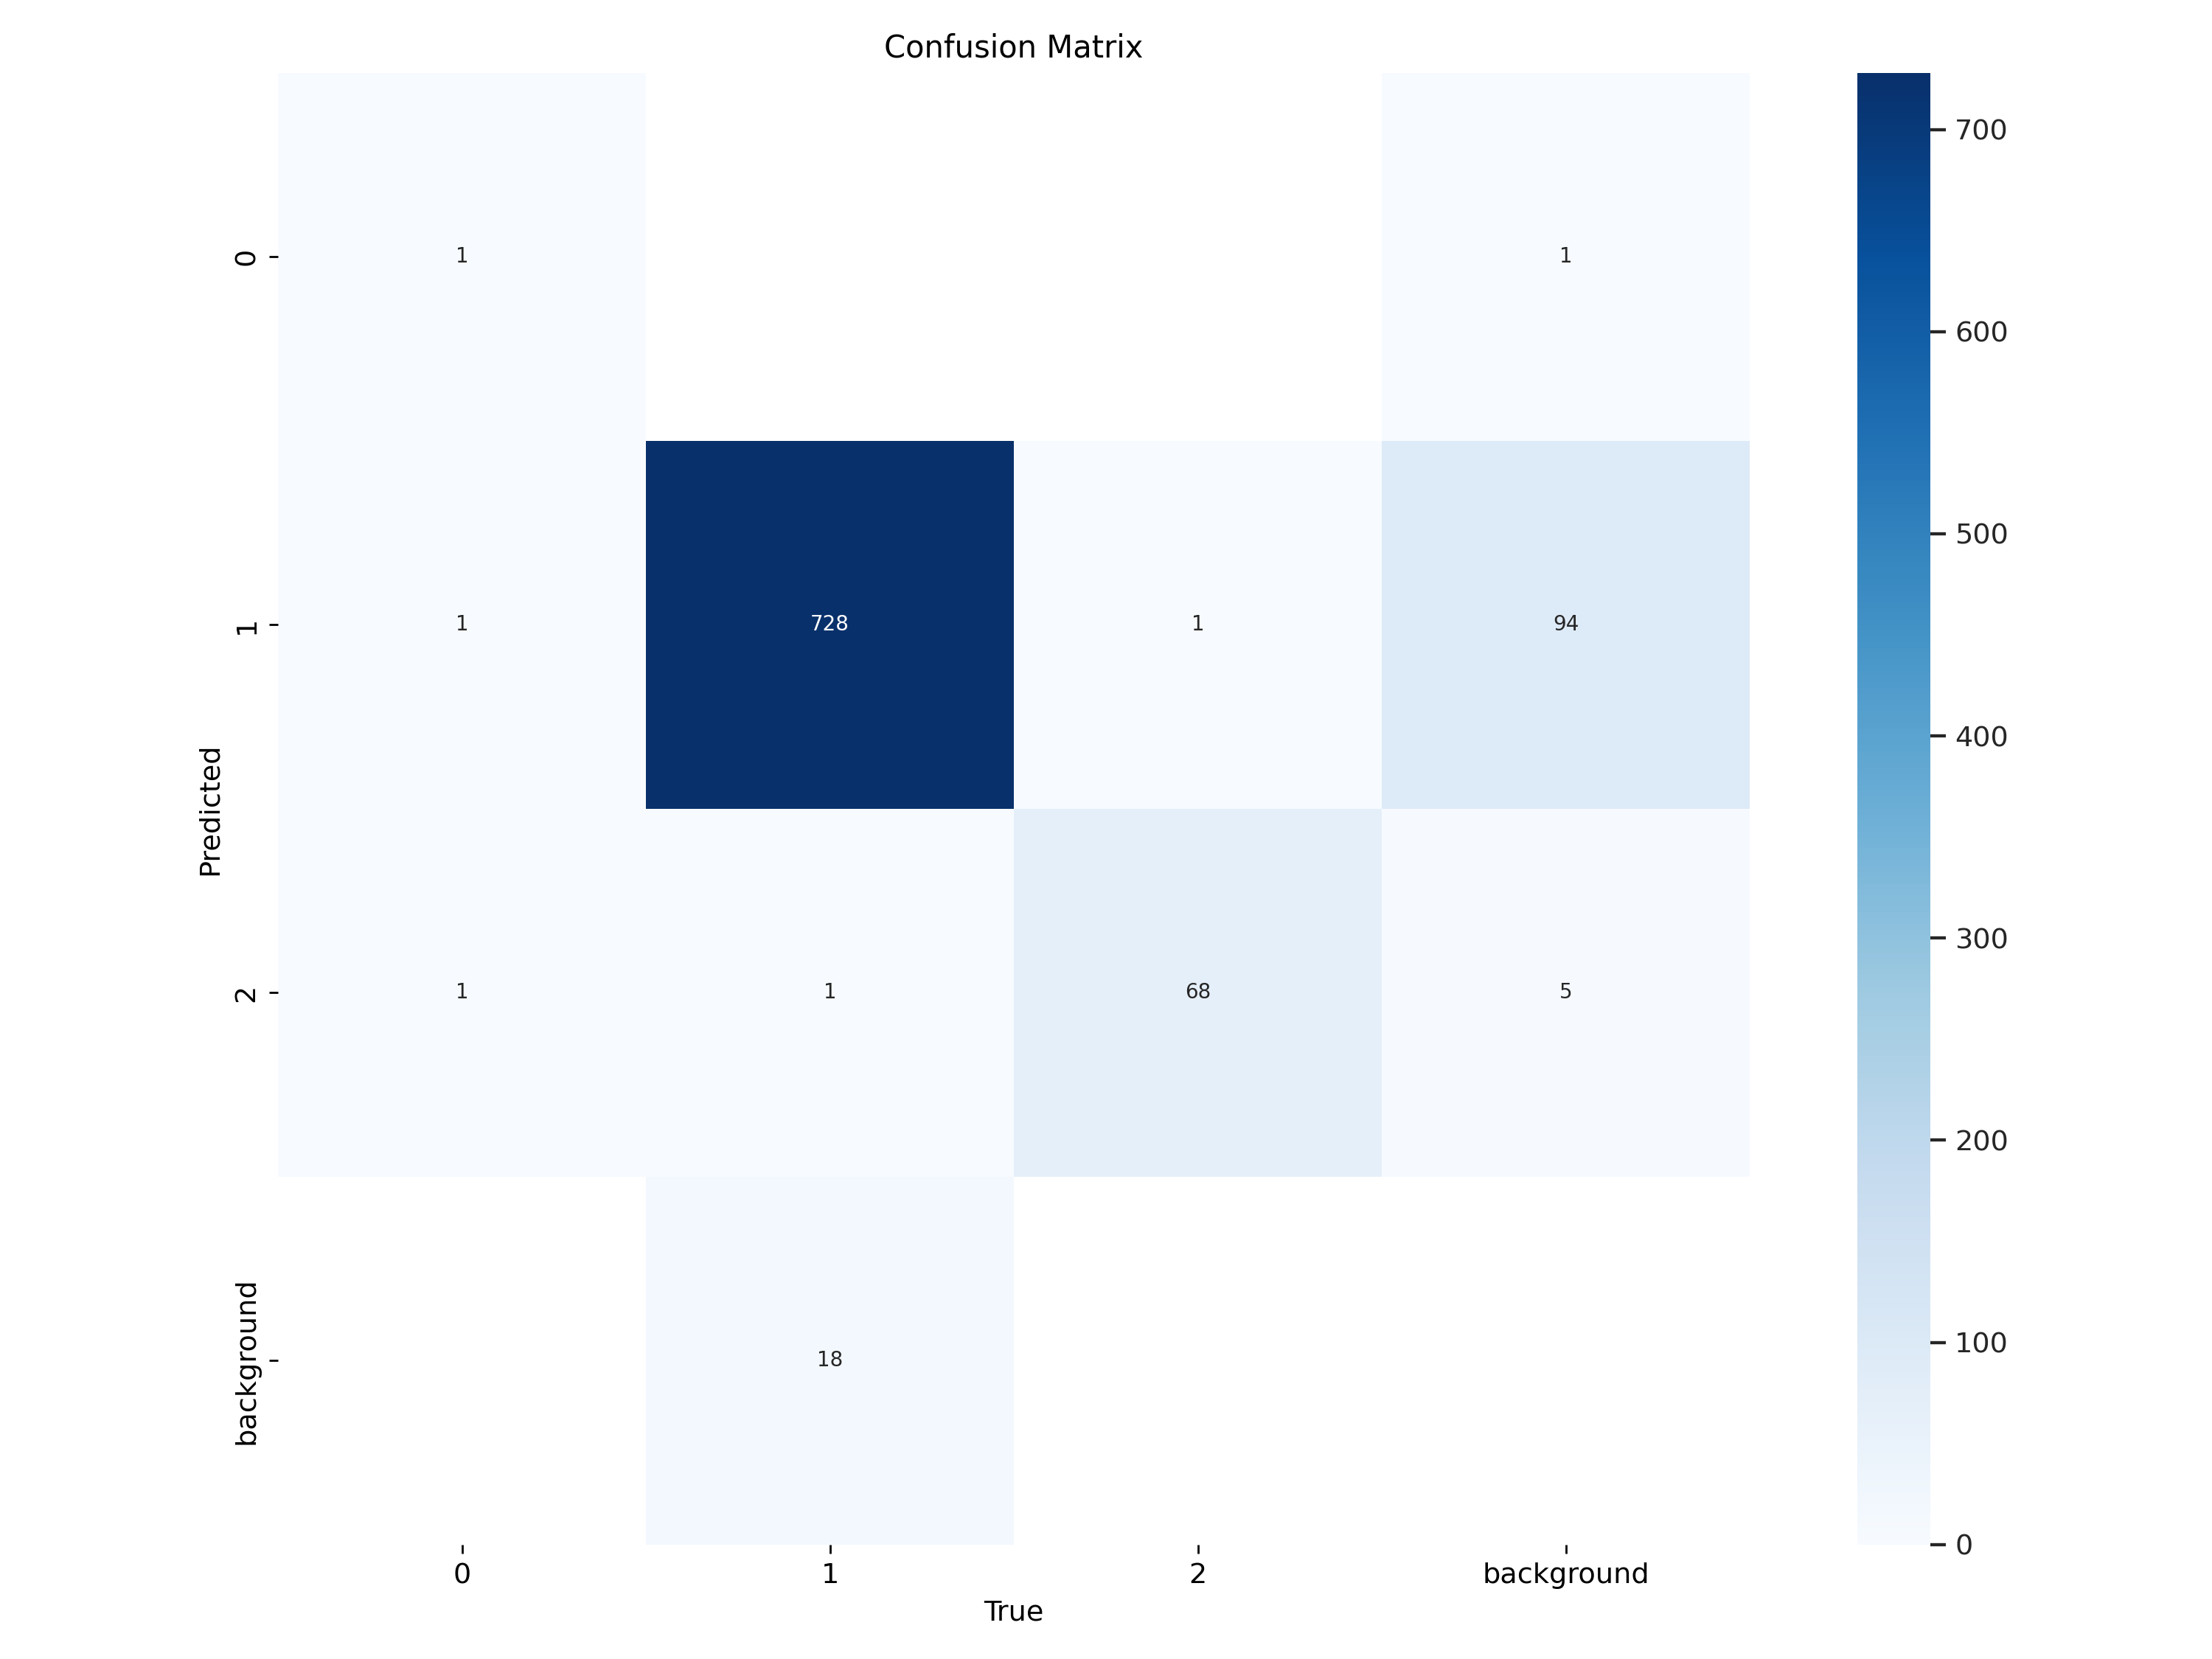

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=600)

/content


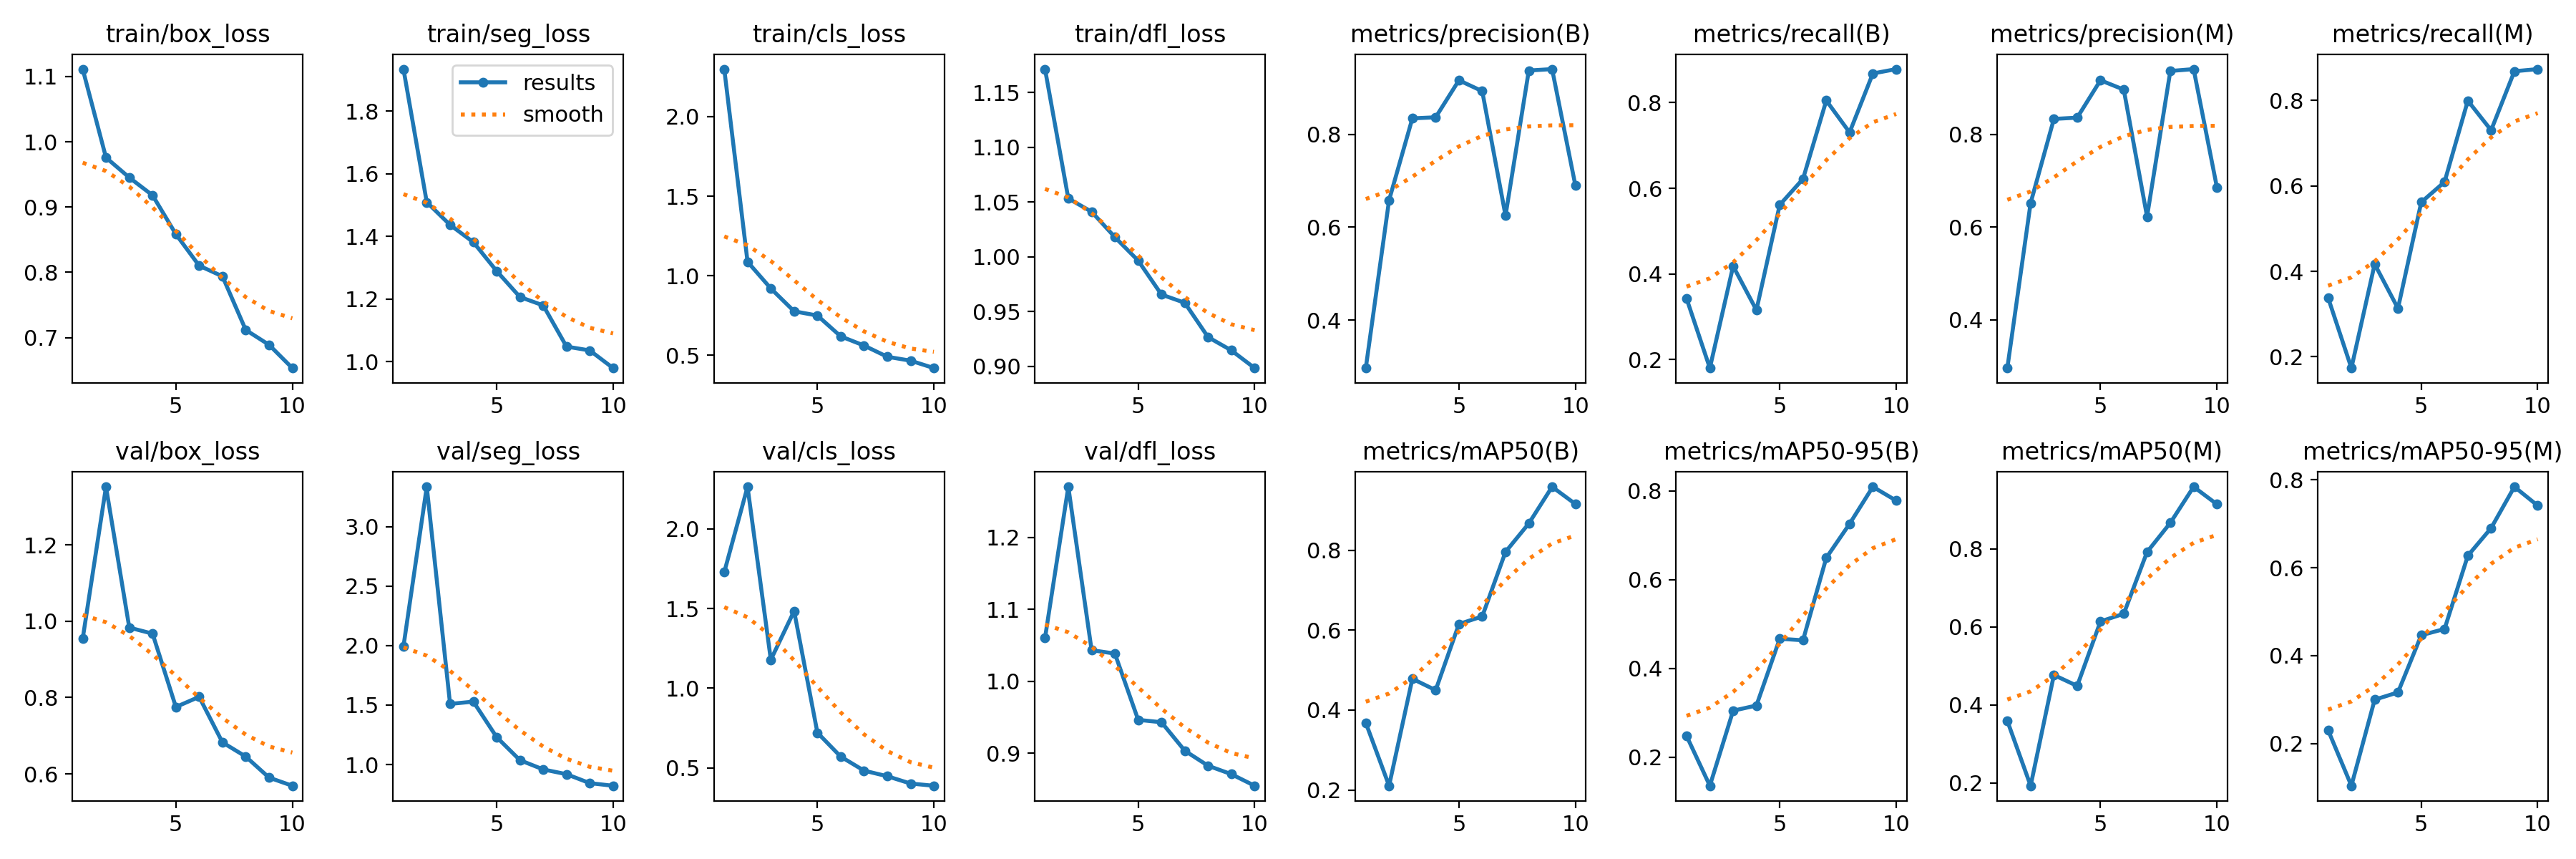

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

/content


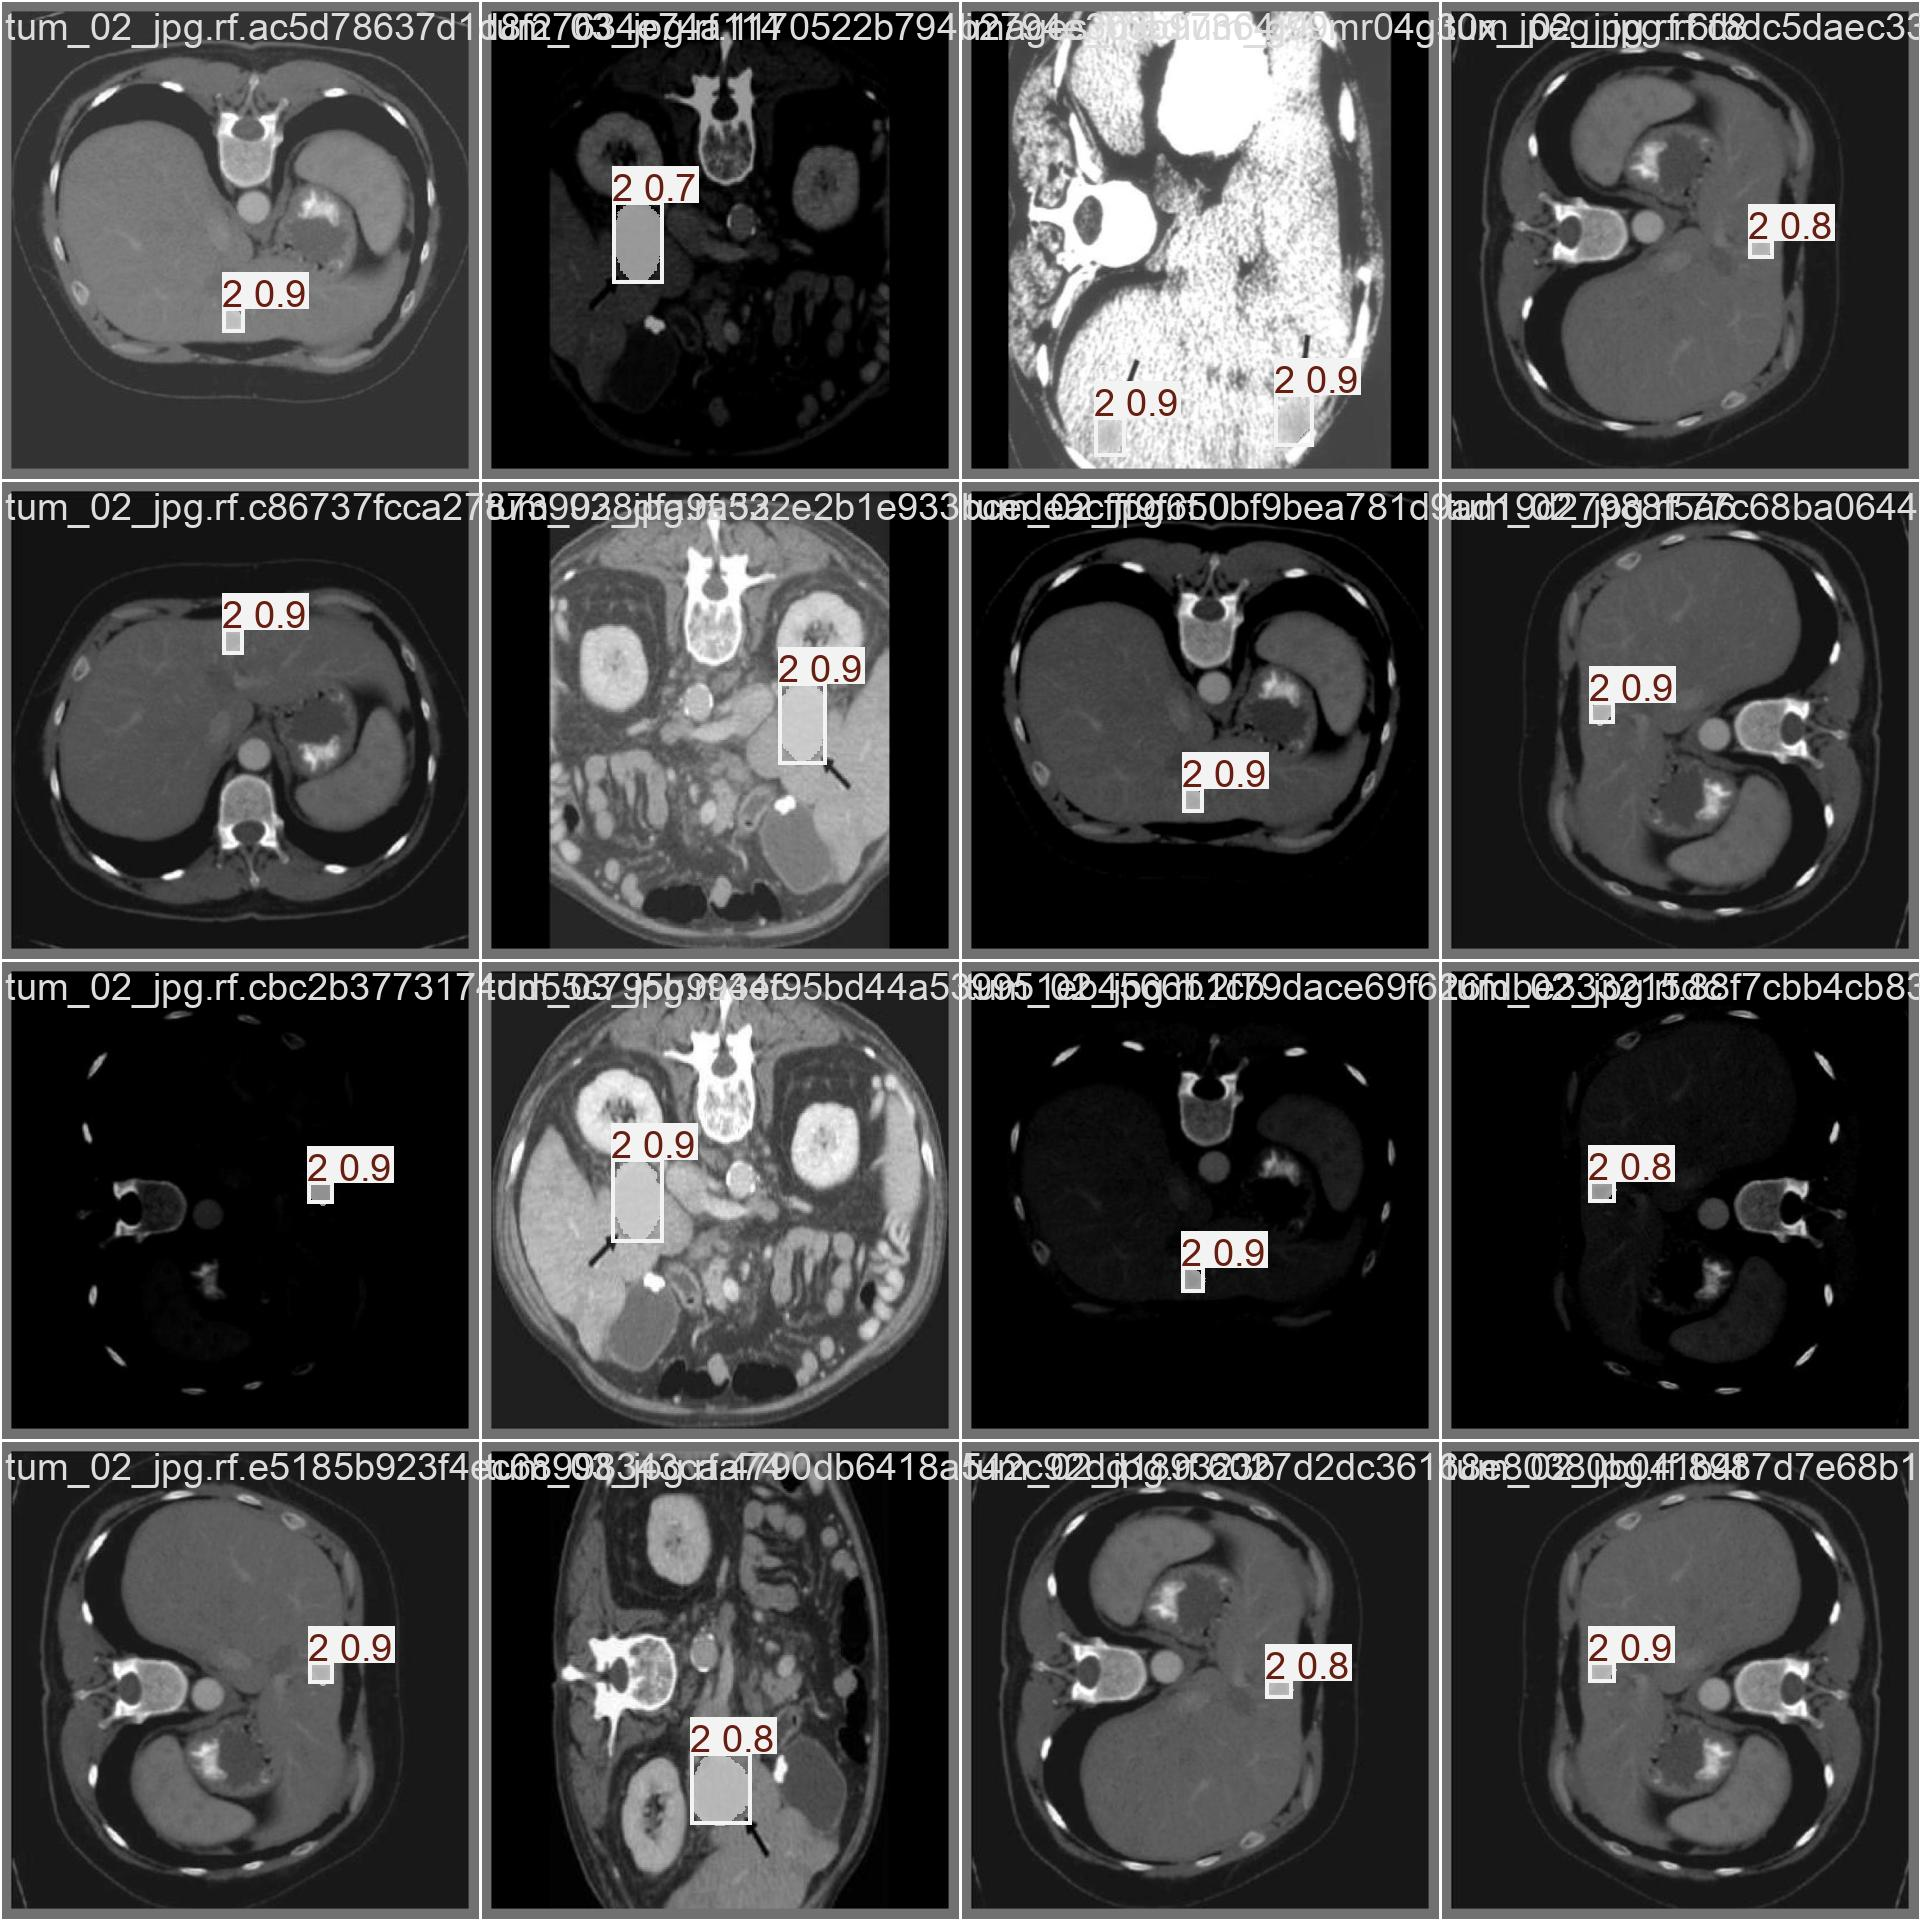

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [27]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/harish-5/valid/labels.cache... 410 images, 0 backgrounds, 0 corrupt: 100% 410/410 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 26/26 [00:12<00:00,  2.10it/s]
                   all        410        819       0.94      0.868      0.959      0.809      0.941      0.868      0.959      0.784
                     0          3          3          1      0.659      0.913       0.83          1      0.657      0.913       0.78
                     1        355        747        0.9       0.96      0.982       0.85      0.901      0.961      0.982      0.817
                     2         52         69      0.921      0.986      0.982      0.748      0.921      0.986      0.982  

## Inference with Custom Model

In [28]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs

image 1/212 /content/harish-5/test/images/abs_12_jpg.rf.9f2119c6cddafb31b0504fc6559e0f52.jpg: 640x640 1 2, 20.8ms
image 2/212 /content/harish-5/test/images/abs_15_jpg.rf.930c88120233ad8913a874e361a76c36.jpg: 640x640 1 0, 1 1, 20.9ms
image 3/212 /content/harish-5/test/images/cys_18_jpeg_jpg.rf.50efd30ea4cf084ec7c8d2a846008029.jpg: 640x640 12 1s, 20.8ms
image 4/212 /content/harish-5/test/images/cys_18_jpeg_jpg.rf.ccb75c976020a206c28e1d617e1a3ac7.jpg: 640x640 13 1s, 1 2, 20.9ms
image 5/212 /content/harish-5/test/images/cys_18_jpeg_jpg.rf.f2f22ca01647d449f544dea5d3f88194.jpg: 640x640 11 1s, 2 2s, 20.9ms
image 6/212 /content/harish-5/test/images/cys_19_png_jpg.rf.eebd6d0dec58441aa093e77c2f42ed5e.jpg: 640x640 6 1s, 18.5ms
image 7/212 /content/harish-5/test/images/cys_20_jpeg_jpg.rf.f5d2aa20d3a4d283380a230ad7

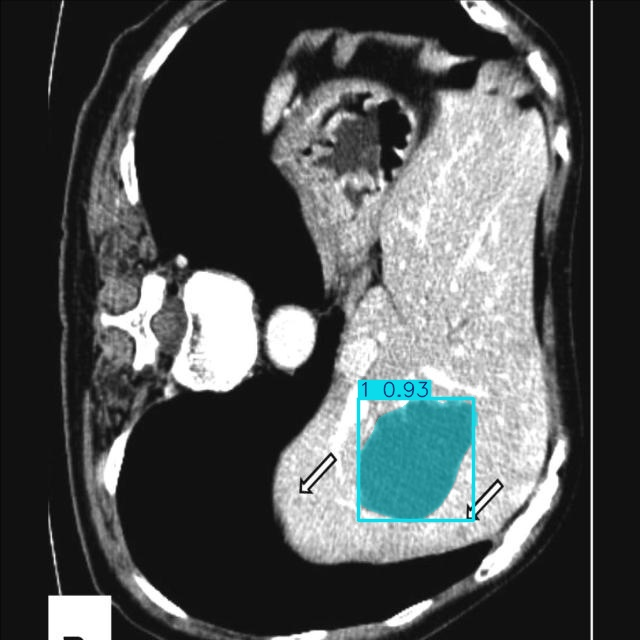

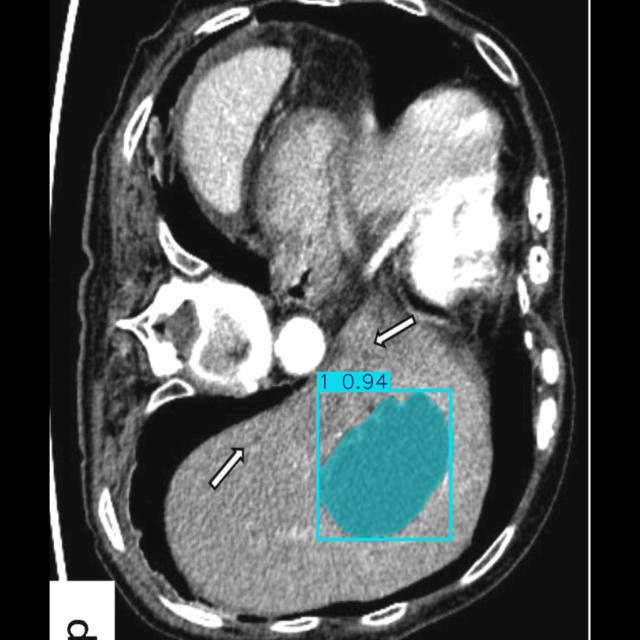

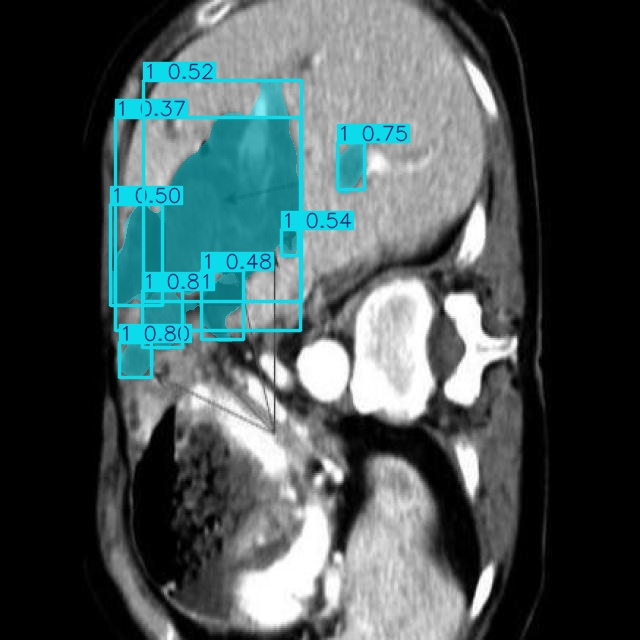

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
